### Importing all the necessary libraries

In [1]:
import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import os
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
from pandas import json_normalize
import json
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Specify the folder path where you want to save the Data
file_name = "Opiod_EMS_calls.csv"

### Making the Directory Global

In [3]:
#To ensure your code is portable and the specified folder is accessible on any system,we are using
#environment variables and the Python os module to dynamically create paths based on the 
#user's system environment and creating the folder if not exist
# Getting the desktop directory
desktop_path = os.path.join(os.path.expanduser("~"), 'Desktop')
new_folder_path = os.path.join(desktop_path, 'DAP Project_teamSNS')
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
file_path = os.path.join(new_folder_path, file_name)
print(f"Directory created at: {new_folder_path}")
print(f"File path: {file_path}")

Directory created at: C:\Users\sanju\Desktop\DAP Project_teamSNS
File path: C:\Users\sanju\Desktop\DAP Project_teamSNS\Opiod_EMS_calls.csv


### Extracting dataset through API

In [4]:
#Firstly we are Going to Extract our dataset through API
# URL to fetch CSV data
url = 'https://data.tempe.gov/api/download/v1/items/2daeeafd2741494c8294ca415e5a793e/csv?layers=0'
# Make the GET request
response = requests.get(url)
print(response)
if response.status_code == 200:
    csv_data = StringIO(response.text)
    # Load data into a pandas DataFrame from the file-like object
    df = pd.read_csv(csv_data)
    # Save the DataFrame to CSV in the specified folder
    df.to_csv(file_path, index=False)
    print(f"Data saved to CSV file at: {file_path}")

else:
    print("Failed to retrieve data. Status code:", response.status_code)
print("Opoid EMS calls CSV DONE")

<Response [200]>
Data saved to CSV file at: C:\Users\sanju\Desktop\DAP Project_teamSNS\Opiod_EMS_calls.csv
Opoid EMS calls CSV DONE


### Dumping the CSV File in Mongodb database

In [5]:
# MongoDB connection
myclient = pymongo.MongoClient("mongodb://localhost:27017")
db = myclient['DAP']  # DAP is the name of the database
# File paths
csv_file_path = f"{new_folder_path}\\Opiod_EMS_calls.csv"
# Inserting CSV data into MongoDB
try:
    collection3 = db.Opiod_calls_data
# Delete existing data in the collection
    collection3.delete_many({})  # This deletes all documents in the collection
    print("Existing data deleted from the collection3.")
    csv_data = pd.read_csv(csv_file_path)
    csv_data_dict = csv_data.to_dict('records')
    collection3.insert_many(csv_data_dict)
    print("Opiod_calls_data successfully inserted into MongoDB.")
except Exception as e:
    print("An error occurred while inserting CSV data:", e)

Existing data deleted from the collection3.
Opiod_calls_data successfully inserted into MongoDB.


### Extracting data from mongodb into Dataframe

In [6]:
client = MongoClient()
#point the client at mongo URI
client = MongoClient('mongodb://localhost:27017')
#select database
db = client['DAP']
#select collection
df = db.Opiod_calls_data
#convert entire collection to pandas Dataframe
df =pd.DataFrame(list(df.find()))
df.head()

,_id,ï»¿X,Y,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,...,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Latitude_Random,Longitude_Random,Spec_Pop,Notes,Time_of_Day
0,6630bf4ecc79ae7b90caf58f,-111.8904,33.4196,1,2017/01/03 00:00:00+00,Tuesday,(3) Tuesday,January,(01) January,2017,...,40 to 44,Female,No,No,No,33.4196,-111.8904,None,None,Morning
1,6630bf4ecc79ae7b90caf590,-111.9505,33.4127,2,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,40 to 44,Male,No,No,No,33.4127,-111.9505,None,None,Overnight
2,6630bf4ecc79ae7b90caf591,-111.9249,33.3971,3,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,20 to 24,Male,No,No,Yes,33.3971,-111.9249,Homeless,None,Overnight
3,6630bf4ecc79ae7b90caf592,-111.9334,33.4297,4,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,20 to 24,Male,No,No,Yes,33.4297,-111.9334,Homeless,None,Morning
4,6630bf4ecc79ae7b90caf593,-111.9014,33.3681,5,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,70 to 74,Male,No,No,No,33.3681,-111.9014,None,None,Afternoon


In [7]:
df.tail()

,_id,ï»¿X,Y,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,...,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Latitude_Random,Longitude_Random,Spec_Pop,Notes,Time_of_Day
2738,6630bf4ecc79ae7b90cb0041,-111.957,33.380,2740,2023/01/01 07:00:00+00,Sunday,(1) Sunday,January,(01) January,2023,...,40 to 44,Male,Unknown,Unknown,Unknown,33.380,-111.957,Unknown,NaN,Afternoon
2739,6630bf4ecc79ae7b90cb0042,-111.929,33.324,2741,2023/01/03 07:00:00+00,Tuesday,(3) Tuesday,January,(01) January,2023,...,15 to 19,Male,No,No,No,33.324,-111.929,No,NaN,Evening
2740,6630bf4ecc79ae7b90cb0043,-111.925,33.448,2742,2023/01/05 07:00:00+00,Thursday,(5) Thursday,January,(01) January,2023,...,15 to 19,Male,No,No,No,33.448,-111.925,No,NaN,Evening
2741,6630bf4ecc79ae7b90cb0044,-111.934,33.400,2743,2023/01/07 07:00:00+00,Saturday,(7) Saturday,January,(01) January,2023,...,50 to 54,Male,No,No,No,33.400,-111.934,No,NaN,Morning
2742,6630bf4ecc79ae7b90cb0045,-111.954,33.410,2744,2023/01/09 07:00:00+00,Monday,(2) Monday,January,(01) January,2023,...,20 to 24,Male,Unknown,Unknown,Unknown,33.410,-111.954,Unknown,NaN,Overnight


In [8]:
df = df.drop(columns=['ï»¿X','Y','Latitude_Random','Longitude_Random'])
df.head()

,_id,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,Opioid_Use,Narcan_Given,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Spec_Pop,Notes,Time_of_Day
0,6630bf4ecc79ae7b90caf58f,1,2017/01/03 00:00:00+00,Tuesday,(3) Tuesday,January,(01) January,2017,Yes,NaN,40 to 44,Female,No,No,No,None,None,Morning
1,6630bf4ecc79ae7b90caf590,2,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,Unknown,Yes,40 to 44,Male,No,No,No,None,None,Overnight
2,6630bf4ecc79ae7b90caf591,3,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,Yes,NaN,20 to 24,Male,No,No,Yes,Homeless,None,Overnight
3,6630bf4ecc79ae7b90caf592,4,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,Yes,NaN,20 to 24,Male,No,No,Yes,Homeless,None,Morning
4,6630bf4ecc79ae7b90caf593,5,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,Yes,NaN,70 to 74,Male,No,No,No,None,None,Afternoon


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               2743 non-null   object
 1   OBJECTID          2743 non-null   int64 
 2   Incident_Date     2743 non-null   object
 3   Weekday           2743 non-null   object
 4   Weekday_Sort      2743 non-null   object
 5   Month             2407 non-null   object
 6   Month_Sort        2743 non-null   object
 7   Year              2743 non-null   int64 
 8   Opioid_Use        2743 non-null   object
 9   Narcan_Given      2232 non-null   object
 10  Age               2743 non-null   object
 11  Patient_Gender    2742 non-null   object
 12  Patient_ASU       2724 non-null   object
 13  Patient_Veteran   2722 non-null   object
 14  Patient_Homeless  2724 non-null   object
 15  Spec_Pop          2743 non-null   object
 16  Notes             1618 non-null   object
 17  Time_of_Day   

In [10]:
df.sample()

,_id,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,Opioid_Use,Narcan_Given,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Spec_Pop,Notes,Time_of_Day
1617,6630bf4ecc79ae7b90cafbe0,1619,2021/02/08 00:00:00+00,Monday,(2) Monday,NaN,(02) February,2021,Yes,Yes,85 to 89,Female,Unknown,Unknown,Unknown,No,NaN,Evening


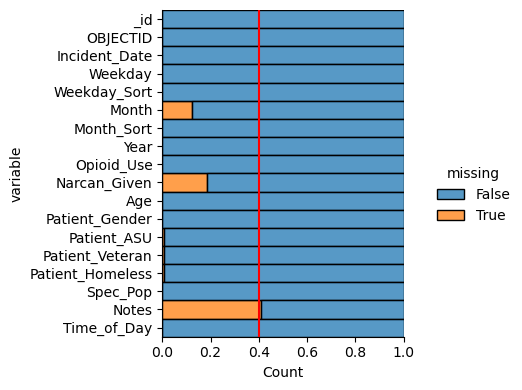

In [11]:
sns.displot(data=df.isnull().melt(value_name='missing'),y='variable',hue='missing',multiple='fill',height=4,aspect=1.1)
plt.axvline(0.4, color='r')

In [12]:
df.isnull().sum()

_id                    0
OBJECTID               0
Incident_Date          0
Weekday                0
Weekday_Sort           0
Month                336
Month_Sort             0
Year                   0
Opioid_Use             0
Narcan_Given         511
Age                    0
Patient_Gender         1
Patient_ASU           19
Patient_Veteran       21
Patient_Homeless      19
Spec_Pop               0
Notes               1125
Time_of_Day            0
dtype: int64

In [13]:
df.describe()

,OBJECTID,Year
count,2743.000000,2743.000000
mean,1372.625592,2019.745534
std,792.386029,1.734406
min,1.000000,2017.000000
25%,686.500000,2018.000000
50%,1373.000000,2020.000000
75%,2058.500000,2021.000000
max,2744.000000,2023.000000


In [14]:
df.isnull().sum()

_id                    0
OBJECTID               0
Incident_Date          0
Weekday                0
Weekday_Sort           0
Month                336
Month_Sort             0
Year                   0
Opioid_Use             0
Narcan_Given         511
Age                    0
Patient_Gender         1
Patient_ASU           19
Patient_Veteran       21
Patient_Homeless      19
Spec_Pop               0
Notes               1125
Time_of_Day            0
dtype: int64

In [15]:
#replacing null values with the most frequent value of that class 
most_frequent = df['Month'].mode()[0]
df['Month'].fillna(most_frequent, inplace=True)
#most_frequent = df['Narcan_Given'].mode()[0]
df['Narcan_Given'].fillna('Unknown', inplace=True)
most_frequent = df['Patient_Gender'].mode()[0]
df['Patient_Gender'].fillna(most_frequent, inplace=True)
most_frequent = df['Patient_ASU'].mode()[0]
df['Patient_ASU'].fillna(most_frequent, inplace=True)
most_frequent = df['Patient_Veteran'].mode()[0]
df['Patient_Veteran'].fillna(most_frequent, inplace=True)
most_frequent = df['Patient_Homeless'].mode()[0]
df['Patient_Homeless'].fillna(most_frequent, inplace=True)
most_frequent = df['Notes'].mode()[0]
df['Notes'].fillna(most_frequent, inplace=True)

In [16]:
df.isnull().sum()

_id                 0
OBJECTID            0
Incident_Date       0
Weekday             0
Weekday_Sort        0
Month               0
Month_Sort          0
Year                0
Opioid_Use          0
Narcan_Given        0
Age                 0
Patient_Gender      0
Patient_ASU         0
Patient_Veteran     0
Patient_Homeless    0
Spec_Pop            0
Notes               0
Time_of_Day         0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Apply LabelEncoder to each categorical column
df['Opioid_Use'] = label_encoder.fit_transform(df['Opioid_Use'])
df['Narcan_Given'] = label_encoder.fit_transform(df['Narcan_Given'])
df['Patient_Gender'] = label_encoder.fit_transform(df['Patient_Gender'])
df['Patient_ASU'] = label_encoder.fit_transform(df['Patient_ASU'])
df['Patient_Veteran'] = label_encoder.fit_transform(df['Patient_Veteran'])
df['Patient_Homeless'] = label_encoder.fit_transform(df['Patient_Homeless'])
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])
df.head()

,_id,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,Opioid_Use,Narcan_Given,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Spec_Pop,Notes,Time_of_Day
0,6630bf4ecc79ae7b90caf58f,1,2017/01/03 00:00:00+00,Tuesday,(3) Tuesday,January,(01) January,2017,2,1,40 to 44,0,0,0,0,None,None,2
1,6630bf4ecc79ae7b90caf590,2,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,1,2,40 to 44,1,0,0,0,None,None,3
2,6630bf4ecc79ae7b90caf591,3,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,2,1,20 to 24,1,0,0,2,Homeless,None,3
3,6630bf4ecc79ae7b90caf592,4,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,2,1,20 to 24,1,0,0,2,Homeless,None,2
4,6630bf4ecc79ae7b90caf593,5,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,2,1,70 to 74,1,0,0,0,None,None,0


In [18]:
df.corr()

,OBJECTID,Year,Opioid_Use,Narcan_Given,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Time_of_Day
OBJECTID,1.000000,0.977766,0.147768,-0.059966,0.025245,0.027027,0.068899,0.131537,-0.020050
Year,0.977766,1.000000,0.166866,-0.072219,0.031679,0.023628,0.066620,0.124169,-0.015854
Opioid_Use,0.147768,0.166866,1.000000,-0.135098,0.039092,-0.051391,-0.088396,0.028793,0.003695
Narcan_Given,-0.059966,-0.072219,-0.135098,1.000000,-0.002249,0.164278,0.165500,-0.123879,-0.015262
Patient_Gender,0.025245,0.031679,0.039092,-0.002249,1.000000,0.046506,0.100216,0.140364,0.021138
Patient_ASU,0.027027,0.023628,-0.051391,0.164278,0.046506,1.000000,0.500290,0.137431,0.017384
Patient_Veteran,0.068899,0.066620,-0.088396,0.165500,0.100216,0.500290,1.000000,0.172731,-0.013812
Patient_Homeless,0.131537,0.124169,0.028793,-0.123879,0.140364,0.137431,0.172731,1.000000,-0.021476
Time_of_Day,-0.020050,-0.015854,0.003695,-0.015262,0.021138,0.017384,-0.013812,-0.021476,1.000000


<Axes: >

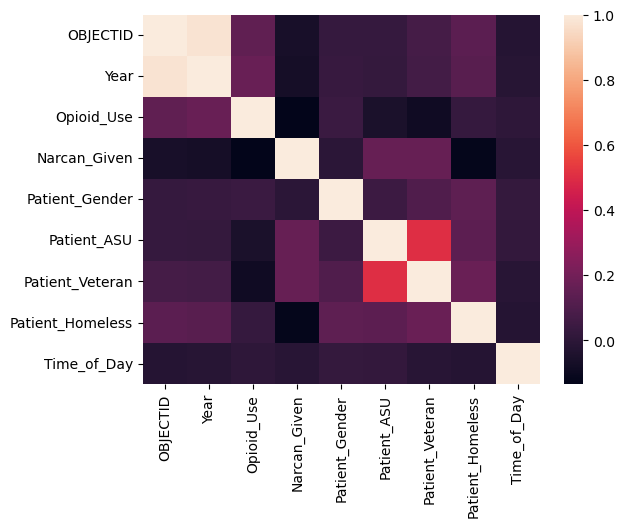

In [19]:
import seaborn as sns 
sns.heatmap(df.corr())

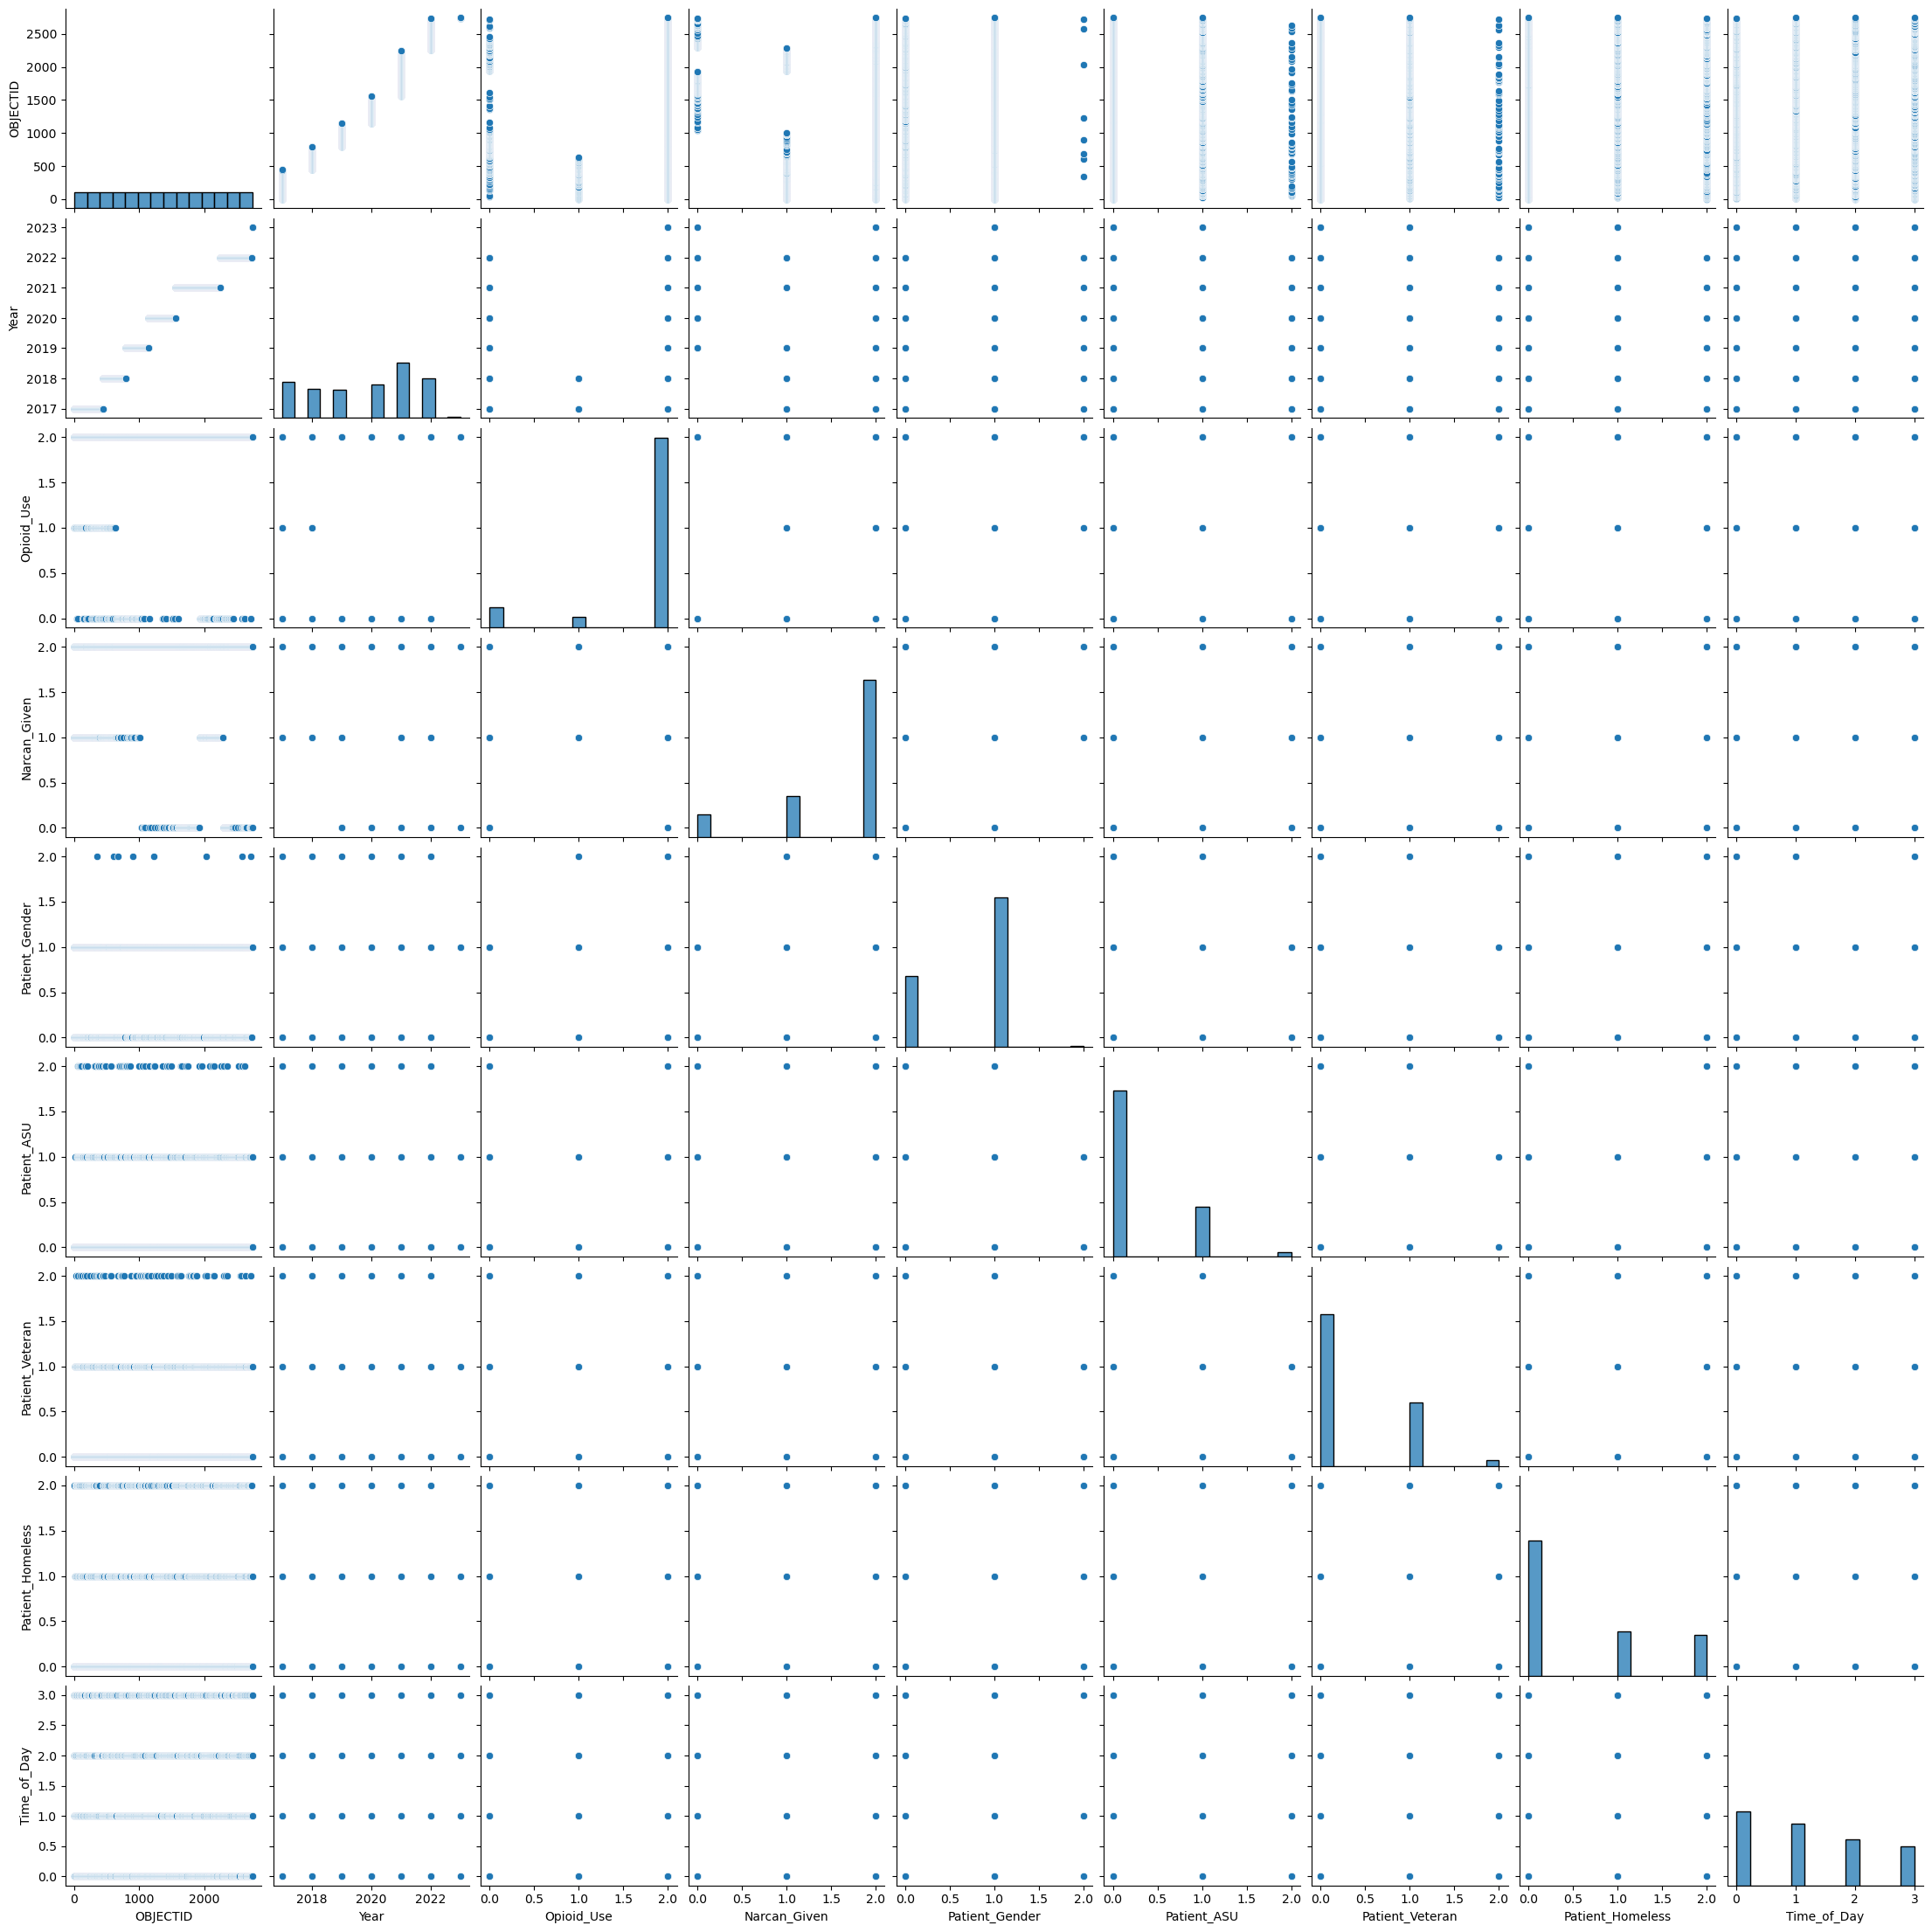

In [20]:
sns.pairplot(df)

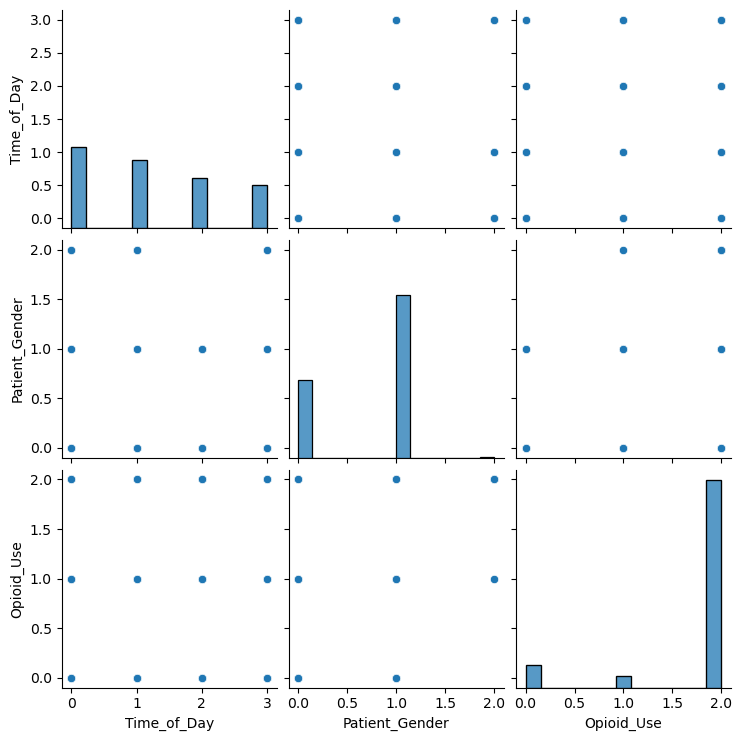

In [21]:
sns.pairplot(df[['Time_of_Day','Patient_Gender','Opioid_Use']])

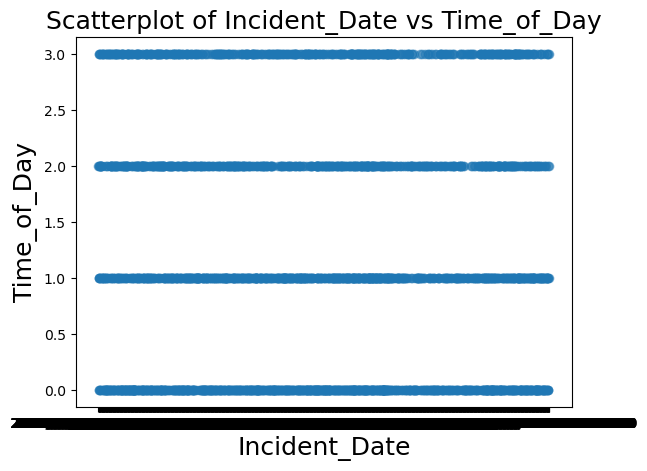

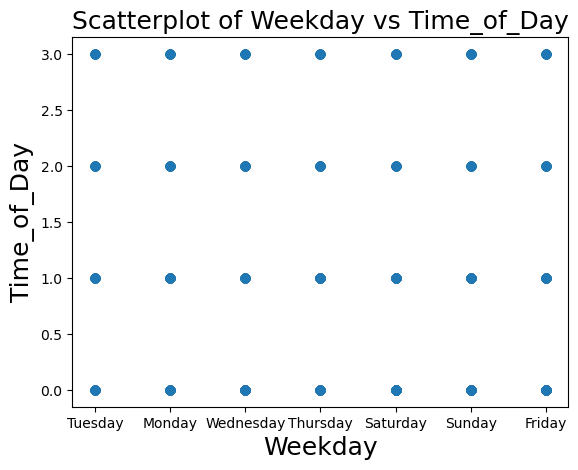

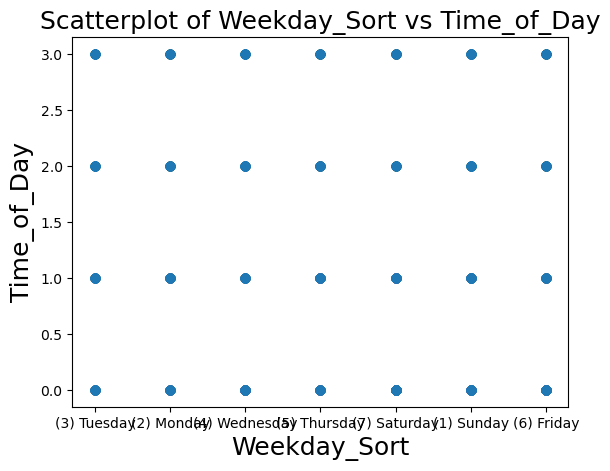

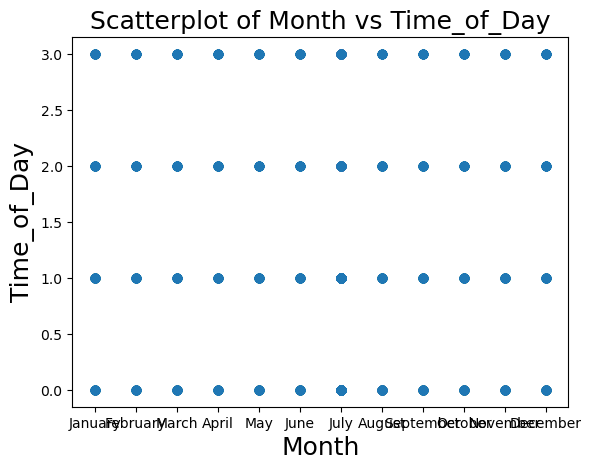

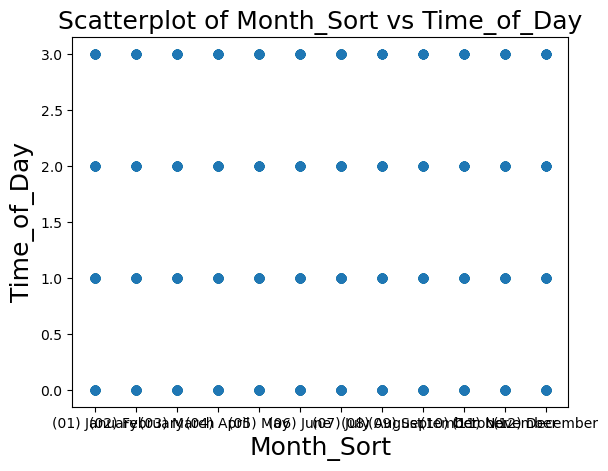

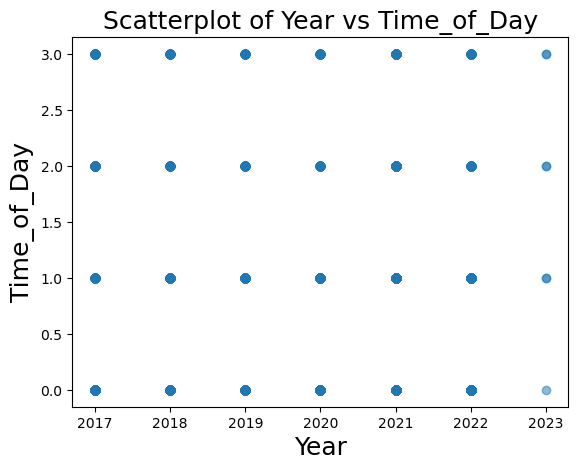

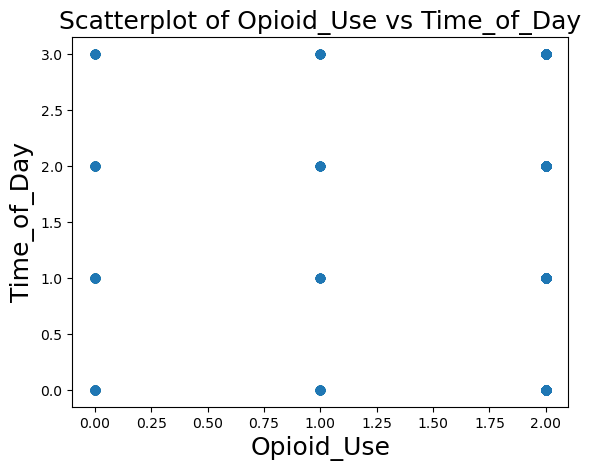

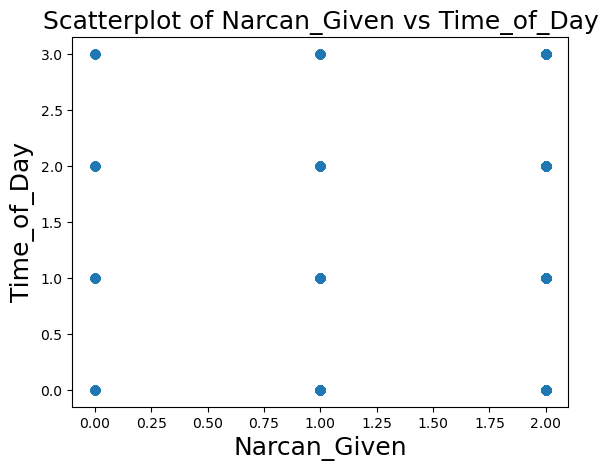

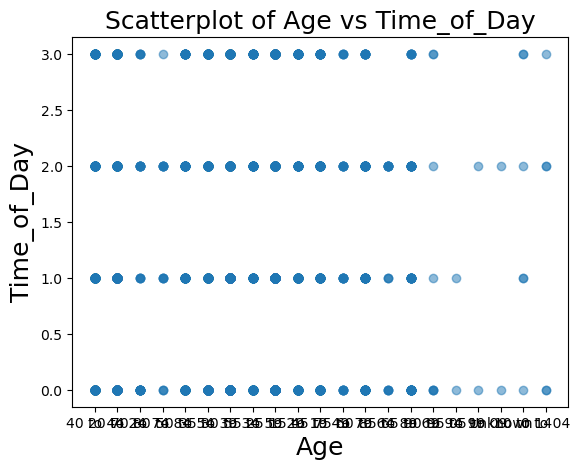

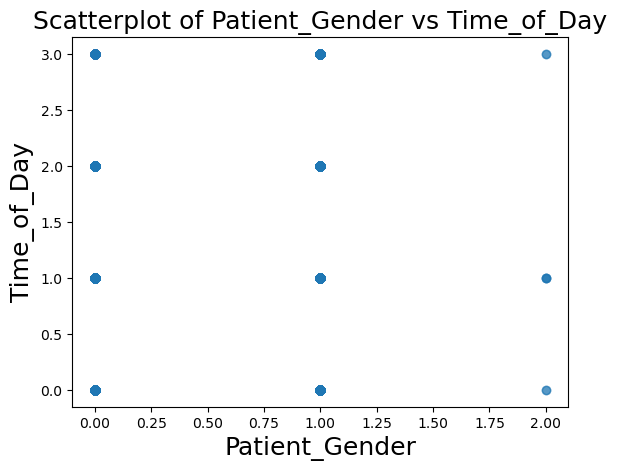

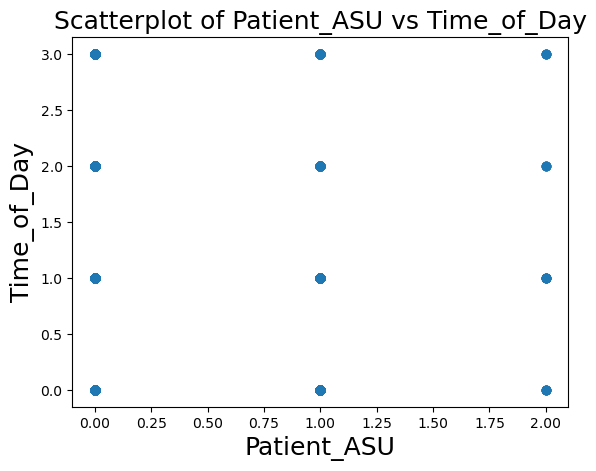

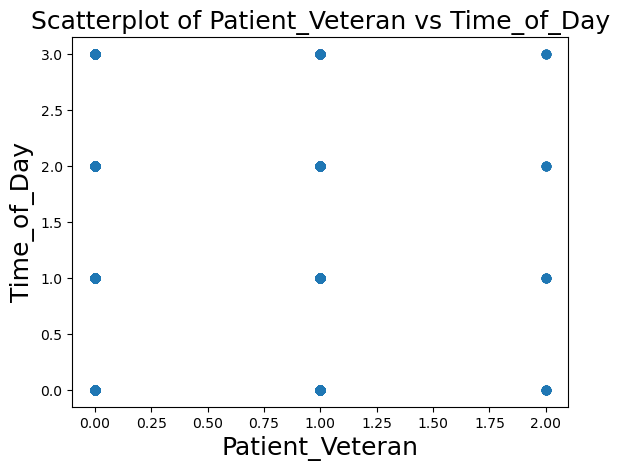

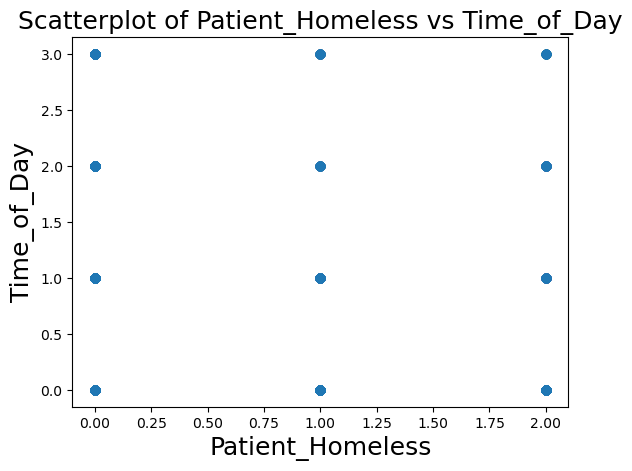

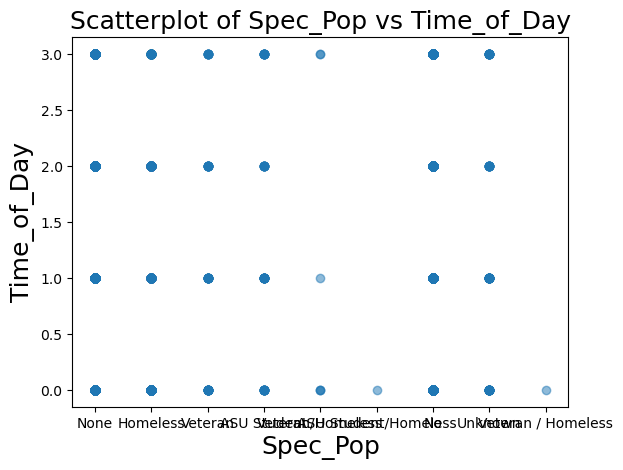

In [22]:
import matplotlib.pyplot as plt
A=['Incident_Date','Weekday','Weekday_Sort','Month','Month_Sort','Year','Opioid_Use','Narcan_Given','Age',
  'Patient_Gender','Patient_ASU','Patient_Veteran','Patient_Homeless','Spec_Pop']
B='Time_of_Day'

for variab in A:
    #To plot scatterplots against wkwage
    plt.scatter(df[variab], df[B], alpha=0.5)
    
    plt.title(f'Scatterplot of {variab} vs {B}',fontsize=18)
    plt.xlabel(variab,fontsize=18)
    plt.ylabel(B,fontsize=18)
    plt.show()

(array([919.,   0.,   0., 768.,   0.,   0., 567.,   0.,   0., 489.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

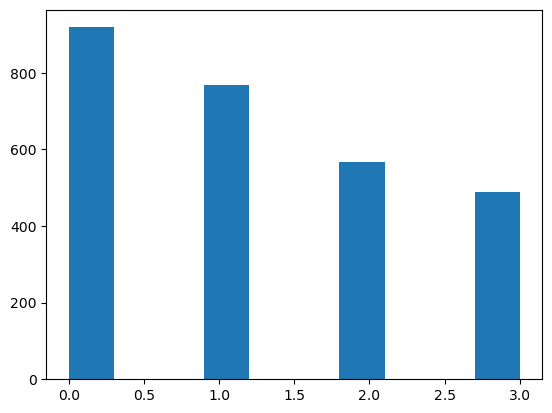

In [23]:
plt.hist(df['Time_of_Day'])

In [24]:
# Preparing the data: Encoding labels and handling missing values
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Narcan_Given'] = label_encoder.fit_transform(df['Narcan_Given'])

In [25]:
from sklearn.model_selection import train_test_split  # Importing the function
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Narcan_Given'], test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Making predictions and evaluating the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Output results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.7358834244080146
Confusion Matrix:
 [[  0   0  47]
 [  0   0  98]
 [  0   0 404]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00        98
           2       0.74      1.00      0.85       404

    accuracy                           0.74       549
   macro avg       0.25      0.33      0.28       549
weighted avg       0.54      0.74      0.62       549



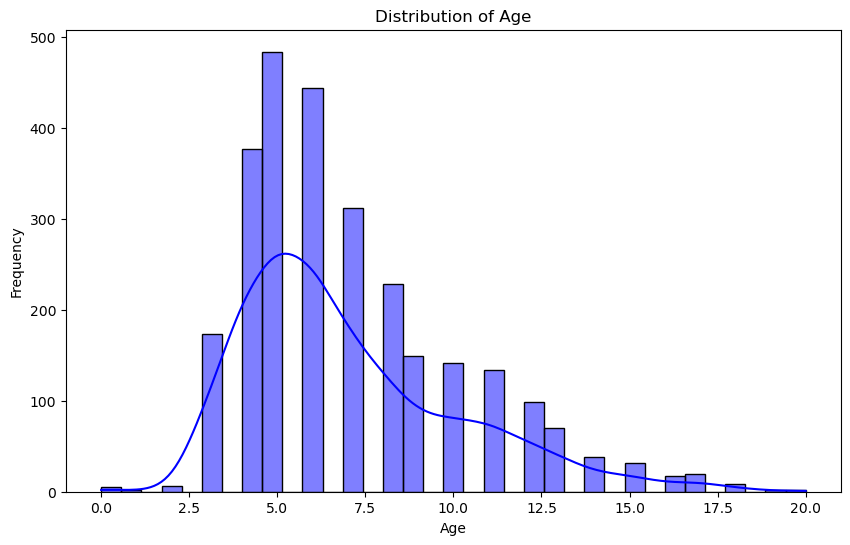

In [29]:
from sklearn.metrics import roc_curve, auc
# Plotting the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

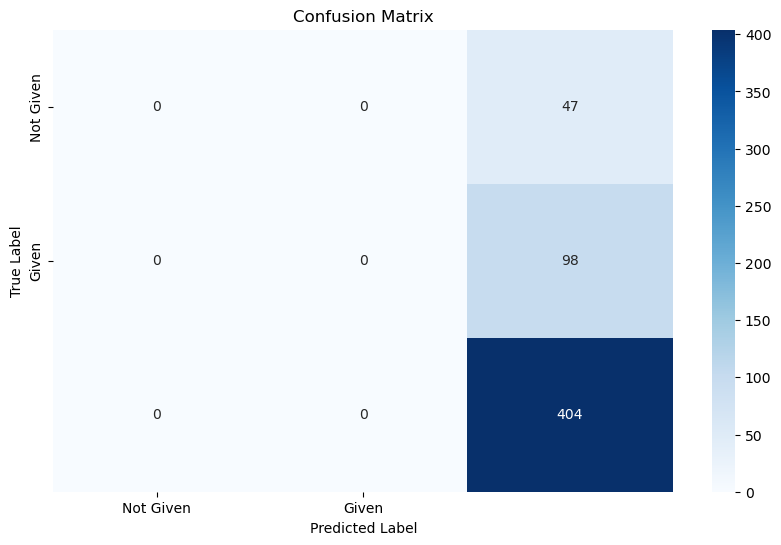

In [30]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Given', 'Given'], yticklabels=['Not Given', 'Given'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Data to be Dumped in postgresql

In [31]:
df.dtypes

_id                 object
OBJECTID             int64
Incident_Date       object
Weekday             object
Weekday_Sort        object
Month               object
Month_Sort          object
Year                 int64
Opioid_Use           int32
Narcan_Given         int64
Age                  int32
Patient_Gender       int32
Patient_ASU          int32
Patient_Veteran      int32
Patient_Homeless     int32
Spec_Pop            object
Notes               object
Time_of_Day          int32
dtype: object

In [32]:
df['_id'] = df['_id'].astype(str)
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'])

In [33]:
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from sqlalchemy import create_engine

In [34]:
# Connection parameters for PostgreSQL
database = {
    "host": "localhost",
    "port": "5432",
    "user": "postgres",
    "password": "Mypassword07"
}

In [35]:
# Establish a connection to the PostgreSQL server
try:
    conn = psycopg2.connect(**database)
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    # Creating a cursor to perform database operations
    cur = conn.cursor()
    # Fisrt it will check if the 'DAP Project' database already exists,
    #if not it will create the database
    cur.execute("SELECT 1 FROM pg_database WHERE datname='DAP Project';")
    exists = cur.fetchone()
    if not exists:
        cur.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier('DAP Project')))
        print("Database 'DAP Project' was successfully created.")
    else:
        print("Database 'DAP Project' already exists. No action was taken.")
except psycopg2.Error as e:
    print("An error occurred: ", e)
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()
print("Finished checking and potentially creating the 'DAP Poject database.")

Database 'DAP Project' already exists. No action was taken.
Finished checking and potentially creating the 'DAP Poject database.


In [36]:
# Create the database engine
# PostgreSQL connection parameters
username = 'postgres'
password = 'Mypassword07'
host = 'localhost'
port = '5432'
database = 'DAP Project'
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

In [37]:
#Finally our all connection setup is done and now by using the 'to_sql' will dump all the
#data in database
df.to_sql('Opiod EMS Calls', con=engine, index=False, if_exists='replace')

743